<a href="https://colab.research.google.com/github/janjuatest/NLP/blob/main/NLP_Using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import nltk
import string
import tensorflow as tf
from tensorflow import keras


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

Import the TF libraries

In [5]:
sentences=["My name is Altamash","My friends' names are Asif, Tauseef"]

Sample sentences to check Tokenizer

In [6]:
df=pd.read_csv('SMSSpamCollection',sep='\t')

In [7]:
df.columns=['Label','Message']

Read the messages into a data frame with columns Label and Message

In [8]:
df

,Label,Message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [9]:
df['LengthSMS']=df['Message'].apply(len)

In [10]:
df

,Label,Message,LengthSMS
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,160
5567,ham,Will ü b going to esplanade fr home?,36
5568,ham,"Pity, * was in mood for that. So...any other s...",57
5569,ham,The guy did some bitching but I acted like i'd...,125


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


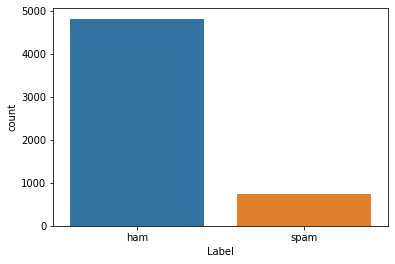

In [11]:
sns.countplot(df['Label'])

The data is unbalanced so learning might not be very good
There will be more false positives are more likely

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5571 non-null   object
 1   Message    5571 non-null   object
 2   LengthSMS  5571 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


There are a total of 5571 messages

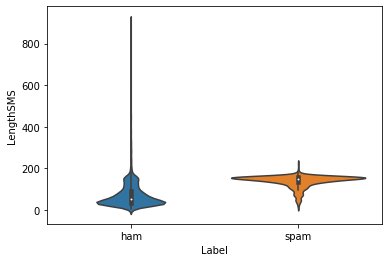

In [13]:
sns.violinplot(data=df,x='Label',y='LengthSMS')

As can be seen above the spam messages are longer and have lower spread in number of characters

In [14]:
tokenizer=Tokenizer(oov_token="<OOV>")

oov_token is the out of vocabulary token 
this is not needed in this project but is a useful tool

In [15]:
tokenizer.fit_on_texts(sentences)

In [16]:
word_index=tokenizer.word_index

In [17]:
print(word_index)

{'<OOV>': 1, 'my': 2, 'name': 3, 'is': 4, 'altamash': 5, "friends'": 6, 'names': 7, 'are': 8, 'asif': 9, 'tauseef': 10}


The sentences have now been tokenized as per the dictionary above. Each words is paired with its associated token number
e.g. my has a token of 1

In [18]:
df['Message'][1:5]

1    Free entry in 2 a wkly comp to win FA Cup fina...
2    U dun say so early hor... U c already then say...
3    Nah I don't think he goes to usf, he lives aro...
4    FreeMsg Hey there darling it's been 3 week's n...
Name: Message, dtype: object

Now lets tokenize these messages and see what happens

In [19]:
tokenizer.fit_on_texts(df['Message'][1:5])

In [20]:
word_index=tokenizer.word_index

In [21]:
print(word_index)

{'<OOV>': 1, 'to': 2, 'my': 3, 'entry': 4, 'fa': 5, 'std': 6, 'u': 7, 'say': 8, 'he': 9, 'name': 10, 'is': 11, 'altamash': 12, "friends'": 13, 'names': 14, 'are': 15, 'asif': 16, 'tauseef': 17, 'free': 18, 'in': 19, '2': 20, 'a': 21, 'wkly': 22, 'comp': 23, 'win': 24, 'cup': 25, 'final': 26, 'tkts': 27, '21st': 28, 'may': 29, '2005': 30, 'text': 31, '87121': 32, 'receive': 33, 'question': 34, 'txt': 35, 'rate': 36, 't': 37, "c's": 38, 'apply': 39, "08452810075over18's": 40, 'dun': 41, 'so': 42, 'early': 43, 'hor': 44, 'c': 45, 'already': 46, 'then': 47, 'nah': 48, 'i': 49, "don't": 50, 'think': 51, 'goes': 52, 'usf': 53, 'lives': 54, 'around': 55, 'here': 56, 'though': 57, 'freemsg': 58, 'hey': 59, 'there': 60, 'darling': 61, "it's": 62, 'been': 63, '3': 64, "week's": 65, 'now': 66, 'and': 67, 'no': 68, 'word': 69, 'back': 70, "i'd": 71, 'like': 72, 'some': 73, 'fun': 74, 'you': 75, 'up': 76, 'for': 77, 'it': 78, 'still': 79, 'tb': 80, 'ok': 81, 'xxx': 82, 'chgs': 83, 'send': 84, '£1':

Good its working, now lets tokenize all the messages

In [22]:
len (word_index)

87

In [23]:
tokenizer.fit_on_texts(df['Message'])

We are currently fitting the tokenizer on all data. Technically this is not optium since we should first split the data into train and test set and then fit the model only on training set.

For this example we will continue as is

In [24]:
word_index=tokenizer.word_index

In [25]:
len(word_index)

9012

There are a total of 9012 distinct words in the corpus

In [49]:
df['messageTokenized']=tokenizer.texts_to_sequences(df['Message'])

In [27]:
df.head()

,Label,Message,LengthSMS,messageTokenized
0,ham,Ok lar... Joking wif u oni...,29,"[47, 339, 1499, 475, 7, 1950]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[48, 457, 9, 20, 5, 756, 843, 3, 177, 1497, 10..."
2,ham,U dun say so early hor... U c already then say...,49,"[7, 244, 150, 24, 374, 2336, 7, 138, 154, 58, ..."
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[963, 2, 98, 109, 70, 474, 3, 904, 70, 1695, 2..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147,"[757, 128, 68, 1498, 145, 110, 157, 1696, 22, ..."


We have now created a new column above with the messages tokenized. YEHA!

Now lets beging the NLP by first making our bag of words and vectorizing the messages

In [30]:
x="ham"
int(x=="ham")

1

Lets convert the Label coulumn into a binary label cloumn
Ham = 1 and Spam =0

In [32]:
df['LabelB']=df['Label'].apply(lambda label : int(label=='ham'))

Now lets look at our processed data frame

In [33]:
df.head()

,Label,Message,LengthSMS,messageTokenized,LabelB
0,ham,Ok lar... Joking wif u oni...,29,"[47, 339, 1499, 475, 7, 1950]",1
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[48, 457, 9, 20, 5, 756, 843, 3, 177, 1497, 10...",0
2,ham,U dun say so early hor... U c already then say...,49,"[7, 244, 150, 24, 374, 2336, 7, 138, 154, 58, ...",1
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[963, 2, 98, 109, 70, 474, 3, 904, 70, 1695, 2...",1
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147,"[757, 128, 68, 1498, 145, 110, 157, 1696, 22, ...",0


Theres only one problem left to input tha data into the Deep Neural Net. The sequence of tokens for each message are not the same length


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
df['messageTokenized'][1:3]

1    [48, 457, 9, 20, 5, 756, 843, 3, 177, 1497, 10...
2    [7, 244, 150, 24, 374, 2336, 7, 138, 154, 58, ...
Name: messageTokenized, dtype: object

In [51]:
pad_sequences(df['messageTokenized'][1:5000])

array([[   0,    0,    0, ...,  635,  385, 2335],
       [   0,    0,    0, ...,  154,   58,  150],
       [   0,    0,    0, ...,  215,  113,  458],
       ...,
       [   0,    0,    0, ...,   84,  132,  526],
       [   0,    0,    0, ...,  289,   37,   11],
       [   0,    0,    0, ...,  677,  356, 8577]], dtype=int32)

In [56]:
paddedMssgs=pad_sequences(df['messageTokenized'])

Great the data frame is ready for tensor flow

In [58]:
paddedMssgs.shape

(5571, 189)

The addedMssgs has all the sms messages that have been tokenzied and then padded.
There are 5571 messages and 189 is the length of the longest message

Now lets start the MACHINE LEARNING using TENSOR FLOW

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(paddedMssgs,df['LabelB'],test_size=0.25)

Splitting the data into test train split

In [61]:
from tensorflow.keras.models import Sequential

In [63]:
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [68]:
model=Sequential([
                  Embedding(10000,16,input_length=200),
                  GlobalAveragePooling1D(),
                  Dense(24,activation='relu'),
                  Dense(1,activation='sigmoid')
])

Embedding decomposes the sentences into reduced dimensions which is 16 in this case
 

Our model has been defined

In [69]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
modelHistory=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),verbose=2)

Epoch 1/50
131/131 - 1s - loss: 0.5403 - accuracy: 0.8652 - val_loss: 0.3876 - val_accuracy: 0.8679
Epoch 2/50
131/131 - 1s - loss: 0.3762 - accuracy: 0.8652 - val_loss: 0.3641 - val_accuracy: 0.8679
Epoch 3/50
131/131 - 1s - loss: 0.3639 - accuracy: 0.8652 - val_loss: 0.3522 - val_accuracy: 0.8679
Epoch 4/50
131/131 - 1s - loss: 0.3494 - accuracy: 0.8652 - val_loss: 0.3352 - val_accuracy: 0.8679
Epoch 5/50
131/131 - 1s - loss: 0.3267 - accuracy: 0.8652 - val_loss: 0.3067 - val_accuracy: 0.8679
Epoch 6/50
131/131 - 1s - loss: 0.2857 - accuracy: 0.8652 - val_loss: 0.2506 - val_accuracy: 0.8686
Epoch 7/50
131/131 - 1s - loss: 0.2121 - accuracy: 0.8973 - val_loss: 0.1714 - val_accuracy: 0.9397
Epoch 8/50
131/131 - 1s - loss: 0.1378 - accuracy: 0.9569 - val_loss: 0.1137 - val_accuracy: 0.9691
Epoch 9/50
131/131 - 1s - loss: 0.0917 - accuracy: 0.9751 - val_loss: 0.0839 - val_accuracy: 0.9770
Epoch 10/50
131/131 - 1s - loss: 0.0662 - accuracy: 0.9823 - val_loss: 0.0668 - val_accuracy: 0.9821

Looks great

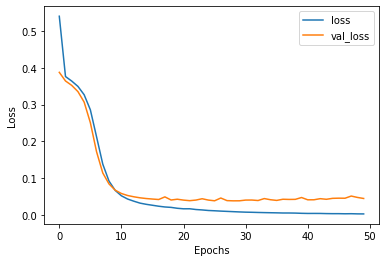

In [80]:
import matplotlib.pyplot as plt
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["loss","val_loss"])

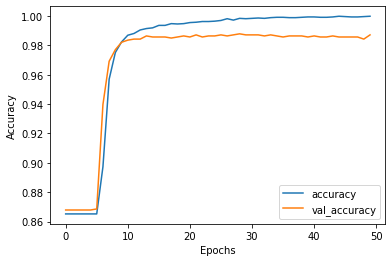

In [83]:
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["accuracy","val_accuracy"])

Model is doing good

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
predictions=model.predict(X_test)

Ignore the warning since we specified a general max length of 200 that is more than the maximumlength


Convert the predictions into binary

In [86]:
binarypredictions=[]
value=0
for entry in predictions:
  if entry >0.5:
    value=1
  else:
    value=0
  binarypredictions.append(value)


In [88]:
print(classification_report(y_test,binarypredictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       184
           1       0.99      1.00      0.99      1209

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



99% accuracy is amazing

In [89]:
print (confusion_matrix(y_test,binarypredictions))

[[ 171   13]
 [   5 1204]]


As expected the false positives are bit more due to the unbalanced data